# House Price Predictions - Preprocessing

In this notebook we will explore and make predictions on the housing dataset from Kaggle:\
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/


* Setup
    * Import Libraries
    * Read the Data
* Cleaning
    * Drop IDs
    * Remove Outliers
    * Target variable
* Feature Engineering
    * Merge dataframes
    * Missing Values
    * Recast some Numerical as Categorical
    * New Features
    * Fix Skewness
    * Label Encoding for Ordinal Categorical Data
    * Get Dummies for Non-Ordinal Categorical Data

# Setup
#### Import Libraries

In [1]:
# data science
import pandas as pd
import numpy as np

# stats
from scipy import stats
from scipy.special import boxcox1p
from scipy.stats import skew, norm
from scipy.stats import boxcox_normmax
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_breuschpagan

# preprocessing
from sklearn.preprocessing import LabelEncoder

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# warnings
import warnings
def ignore_warn(*args, **kwargs): pass
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.warn = ignore_warn

# config
pd.options.display.max_columns = None

#### Read the Data

In [2]:
# data frames
df_train = pd.read_csv('files/train.csv')
df_test = pd.read_csv('files/test.csv')

print('train\t\t', df_train.shape)
print('test\t\t', df_test.shape)

train		 (1460, 81)
test		 (1459, 80)


# Cleaning 

#### Drop IDs
ID column is not needed

In [3]:
df_train.drop("Id", axis = 1, inplace = True)
df_test.drop("Id", axis = 1, inplace = True)

#### Remove Outliers
Remove the two entries with high SalePrice

In [4]:
#visual check for features relevant for removal of outliers
#sns.pairplot(df_num, x_vars=num_features, y_vars='SalePrice', height=5, aspect=.8, kind='reg');

In [5]:
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)

#### Target Variable
Make sure that the target variable is normally distributed

In [6]:
#sns.distplot(df_train['SalePrice'] , fit=stats.norm);
df_yskewed = df_train['SalePrice']
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])

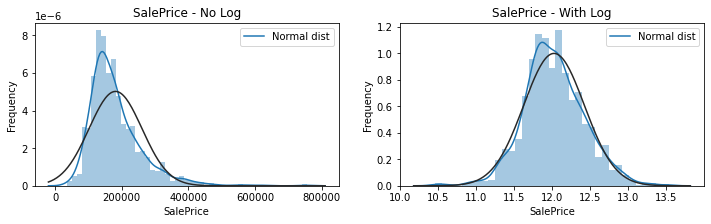

In [7]:
# plot effect of transformation
fig = plt.figure(figsize=(12, 3))

# subplot: skewed distribution
plt.subplot(1, 2, 1)
sns.distplot(df_yskewed , fit=stats.norm);
plt.legend(['Normal dist'])
plt.ylabel('Frequency')
plt.title('SalePrice - No Log')

# subplot: after transformation
plt.subplot(1, 2, 2)
sns.distplot(df_train['SalePrice'] , fit=stats.norm);
plt.legend(['Normal dist'])
plt.ylabel('Frequency')
plt.title('SalePrice - With Log')
plt.show()

# Feature Engineering

#### Merge dataframes
Train and test data is merged for best insight of population data

In [8]:
df_all = pd.concat((df_train, df_test)).reset_index(drop=True)
print("all_data size is : {}".format(df_all.shape))

# keep track
ntrain = df_train.shape[0]
ntest = df_test.shape[0]

all_data size is : (2917, 80)


#### Missing Values
Missing values are identified and handled

In [9]:
df_na = df_all.isnull().sum(axis = 0)
df_na = df_na.drop('SalePrice')
df_na = df_na.where(df_na>0).dropna().sort_values(ascending = False)
df_na / df_all.shape[0] * 100

PoolQC          99.691464
MiscFeature     96.400411
Alley           93.212204
Fence           80.425094
FireplaceQu     48.680151
LotFrontage     16.660953
GarageFinish     5.450806
GarageYrBlt      5.450806
GarageQual       5.450806
GarageCond       5.450806
GarageType       5.382242
BsmtExposure     2.811107
BsmtCond         2.811107
BsmtQual         2.776826
BsmtFinType2     2.742544
BsmtFinType1     2.708262
MasVnrType       0.822763
MasVnrArea       0.788481
MSZoning         0.137127
BsmtFullBath     0.068564
BsmtHalfBath     0.068564
Utilities        0.068564
Functional       0.068564
Exterior2nd      0.034282
Exterior1st      0.034282
SaleType         0.034282
BsmtFinSF1       0.034282
BsmtFinSF2       0.034282
BsmtUnfSF        0.034282
Electrical       0.034282
KitchenQual      0.034282
GarageCars       0.034282
GarageArea       0.034282
TotalBsmtSF      0.034282
dtype: float64

In [10]:
# NONE
df_all["PoolQC"] = df_all["PoolQC"].fillna("None")
df_all["MiscFeature"] = df_all["MiscFeature"].fillna("None")
df_all["Alley"] = df_all["Alley"].fillna("None")
df_all["Fence"] = df_all["Fence"].fillna("None")
df_all["FireplaceQu"] = df_all["FireplaceQu"].fillna("None")
df_all["GarageType"] = df_all["GarageType"].fillna("None")
df_all["GarageFinish"] = df_all["GarageFinish"].fillna("None")
df_all["GarageQual"] = df_all["GarageQual"].fillna("None")
df_all["GarageCond"] = df_all["GarageCond"].fillna("None")
df_all["BsmtQual"] = df_all["BsmtQual"].fillna("None")
df_all["BsmtCond"] = df_all["BsmtCond"].fillna("None")
df_all["BsmtExposure"] = df_all["BsmtExposure"].fillna("None")
df_all["BsmtFinType1"] = df_all["BsmtFinType1"].fillna("None")
df_all["BsmtFinType2"] = df_all["BsmtFinType2"].fillna("None")
df_all["MasVnrType"] = df_all["MasVnrType"].fillna("None")
df_all['MSSubClass'] = df_all['MSSubClass'].fillna("None")

In [11]:
# ZERO
df_all["GarageYrBlt"] = df_all["GarageYrBlt"].fillna(0)
df_all["GarageArea"] = df_all["GarageArea"].fillna(0)
df_all["GarageCars"] = df_all["GarageCars"].fillna(0)
df_all["BsmtFinSF1"] = df_all["BsmtFinSF1"].fillna(0)
df_all["BsmtFinSF2"] = df_all["BsmtFinSF2"].fillna(0)
df_all["BsmtUnfSF"] = df_all["BsmtUnfSF"].fillna(0)
df_all["TotalBsmtSF"] = df_all["TotalBsmtSF"].fillna(0)
df_all["BsmtFullBath"] = df_all["BsmtFullBath"].fillna(0)
df_all["BsmtHalfBath"] = df_all["BsmtHalfBath"].fillna(0)
df_all["MasVnrArea"] = df_all["MasVnrArea"].fillna(0)

In [12]:
# MEDIAN
df_all["LotFrontage"] = df_all.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [13]:
# MODE/DEFAULT
df_all['MSZoning'] = df_all['MSZoning'].fillna(df_all['MSZoning'].mode()[0])
df_all['Electrical'] = df_all['Electrical'].fillna(df_all['Electrical'].mode()[0])
df_all['KitchenQual'] = df_all['KitchenQual'].fillna(df_all['KitchenQual'].mode()[0])
df_all['Exterior1st'] = df_all['Exterior1st'].fillna(df_all['Exterior1st'].mode()[0])
df_all['Exterior2nd'] = df_all['Exterior2nd'].fillna(df_all['Exterior2nd'].mode()[0])
df_all['SaleType'] = df_all['SaleType'].fillna(df_all['SaleType'].mode()[0])
df_all["Functional"] = df_all["Functional"].fillna("Typ")

In [14]:
# DROP
df_all = df_all.drop(['Utilities'], axis=1)

In [15]:
# check again
df_na = df_all.isnull().sum(axis = 0)
df_na = df_na.drop('SalePrice')
df_na = df_na.where(df_na>0).dropna().sort_values(ascending = False)
df_na / df_all.shape[0] * 100

Series([], dtype: float64)

#### Recast some Numerical as Categorical
Some features are represented numerically but is actually categorical data

In [16]:
df_all['MSSubClass'] = df_all['MSSubClass'].apply(str)
df_all['OverallCond'] = df_all['OverallCond'].astype(str)
df_all['YrSold'] = df_all['YrSold'].astype(str)
df_all['MoSold'] = df_all['MoSold'].astype(str)

#### New Features
Relevant new features are added

In [17]:
df_all['TotalSF'] = df_all['TotalBsmtSF'] + df_all['1stFlrSF'] + df_all['2ndFlrSF']

#### Fix Skewness
To normalize data we can apply a box-cox transformation of highly skewed numerical features

In [18]:
num_features = df_all.select_dtypes(exclude = ["object"]).columns
df_skew = df_all[num_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
df_skew = df_skew.drop('SalePrice')
print('There are', df_skew.shape[0], 'numerical features')
df_skew = df_skew[abs(df_skew) > 0.75]

There are 33 numerical features


In [19]:
# fix skewness
print('Applying Box-Cox transformation to', df_skew.shape[0], 'highly skewed features')
skewed_features = df_skew.index
lam = 0.15
for feat in skewed_features:
    df_all[feat] = boxcox1p(df_all[feat], lam)

Applying Box-Cox transformation to 21 highly skewed features


#### Label Encoding for Ordinal Categorical Data

In [20]:
# Label Encoding
cols = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 
        'GarageCond', 'ExterQual', 'ExterCond','HeatingQC', 
        'PoolQC', 'KitchenQual', 'BsmtFinType1', 'BsmtFinType2', 
        'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 
        'LandSlope', 'LotShape', 'PavedDrive', 'Street', 
        'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold']

# encode train
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df_all[c].values)) 
    df_all[c] = lbl.transform(list(df_all[c].values))

#### Get Dummies for Non-Ordinal Categorical Data

In [21]:
df_all = pd.get_dummies(df_all)

#### Consolidate and Save Result
The cleaned data is saved

In [22]:
# update train and test
df_train = df_all[:ntrain]
df_test = df_all[ntrain:]
df_test = df_all[ntrain:].drop(columns='SalePrice')

# print shape
print('rows/cols:', df_train.shape[0], df_train.shape[1], 'train')
print('rows/cols:', df_test.shape[0], df_test.shape[1], 'test')

rows/cols: 1458 221 train
rows/cols: 1459 220 test


In [23]:
# update train and test
df_train = df_all[:ntrain]
df_test = df_all[ntrain:]
df_test = df_test.drop(columns='SalePrice') # nan

# save data
df_train.to_csv ('files/train_processed.csv', index = False, header=True)
df_test.to_csv ('files/test_processed.csv', index = False, header=True)